/home/jesse_chen/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


第一组数据拟合结果：
A0 = 1.000000, f0 = 1.000000, beta = 1.000000
第二组数据拟合结果：
A0 = 8.431878, f0 = 498.243319, beta = -0.085490


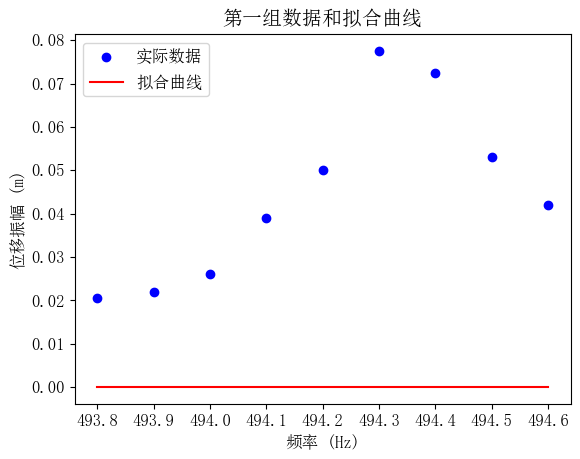

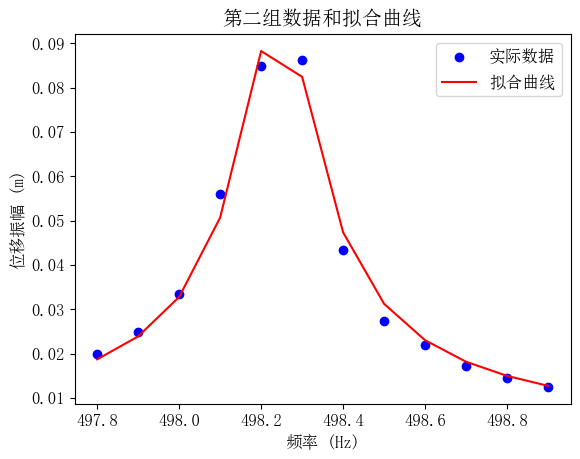

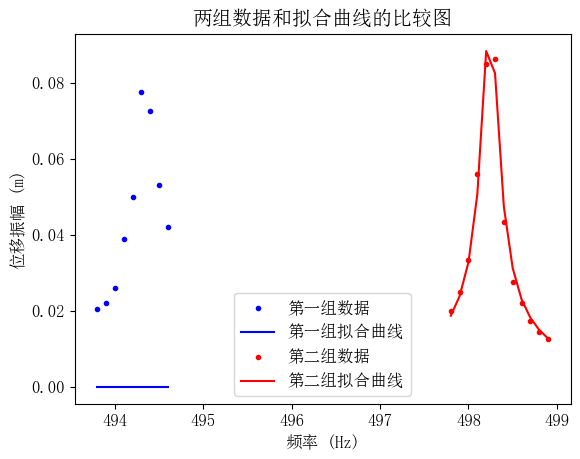

In [15]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义函数模型
def func(f, A0, f0, beta):
    return A0 / np.sqrt((f0**2 - f**2)**2 + (2 * beta * f)**2)

# 读取第一组数据
f1 = np.array([493.8, 493.9, 494, 494.1, 494.2, 494.3, 494.4, 494.5, 494.6])
n1 = np.array([4.1, 4.4, 5.2, 7.8, 10, 15.5, 14.5, 10.6, 8.4])
A1 = np.array([0.0205, 0.022, 0.026, 0.039, 0.05, 0.0775, 0.0725, 0.053, 0.042])

# 拟合第一组数据
popt1, pcov1 = curve_fit(func, f1, A1)
# popt1 是拟合出的参数数组，pcov1 是参数协方差矩阵
# popt1[0] 对应 A0，popt1[1] 对应 f0，popt1[2] 对应 beta

# 打印拟合结果
print("第一组数据拟合结果：")
print("A0 = {:.6f}, f0 = {:.6f}, beta = {:.6f}".format(popt1[0], popt1[1], popt1[2]))

# 绘制第一组数据和拟合曲线
plt.figure(1)
plt.plot(f1, A1, 'bo', label='实际数据')
plt.plot(f1, func(f1, *popt1), 'r-', label='拟合曲线')
plt.xlabel('频率 (Hz)')
plt.ylabel('位移振幅 (m)')
plt.title('第一组数据和拟合曲线')
plt.legend()

# 读取第二组数据
f2 = np.array([497.8, 497.9, 498.0, 498.1, 498.2, 498.3, 498.4,
               498.5, 498.6, 498.7, 498.8, 498.9])
n2 = np.array([4, 5, 6.7, 11.2, 17, 17.24,
               8.7, 5.5 ,4.4 ,3.45 ,2.91 ,2.5])
A2 = np.array([0.02 ,0.025 ,0.0335 ,0.056 ,0.085 ,0.0862 ,
               0.0435 ,0.0275 ,0.022 ,0.01725 ,0.01455 ,0.0125])

# 拟合第二组数据
popt2, pcov2 = curve_fit(func, f2, A2)
# popt2 是拟合出的参数数组，pcov2 是参数协方差矩阵
# popt2[0] 对应 A0，popt2[1] 对应 f0，popt2[2] 对应 beta

# 打印拟合结果
print("第二组数据拟合结果：")
print("A0 = {:.6f}, f0 = {:.6f}, beta = {:.6f}".format(popt2[0], popt2[1], popt2[2]))

# 绘制第二组数据和拟合曲线
plt.figure(2)
plt.plot(f2, A2, 'bo', label='实际数据')
plt.plot(f2, func(f2, *popt2), 'r-', label='拟合曲线')
plt.xlabel('频率 (Hz)')
plt.ylabel('位移振幅 (m)')
plt.title('第二组数据和拟合曲线')
plt.legend()

# 绘制两组数据和拟合曲线的比较图
plt.figure(3)
plt.plot(f1, A1, 'b.', label='第一组数据')
plt.plot(f1, func(f1, *popt1), 'b-', label='第一组拟合曲线')
plt.plot(f2, A2, 'r.', label='第二组数据')
plt.plot(f2, func(f2, *popt2), 'r-', label='第二组拟合曲线')
plt.xlabel('频率 (Hz)')
plt.ylabel('位移振幅 (m)')
plt.title('两组数据和拟合曲线的比较图')
plt.legend()

# 显示图形
plt.show()


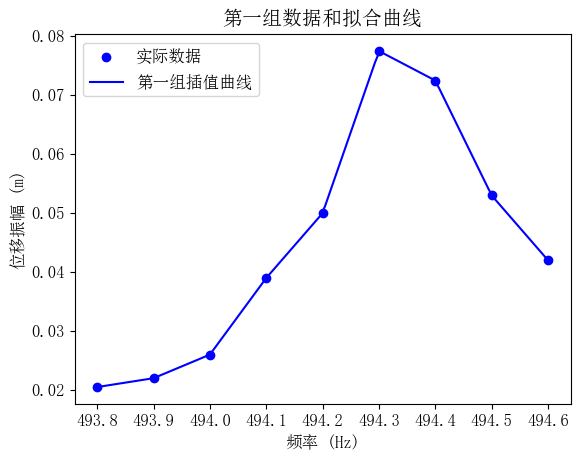

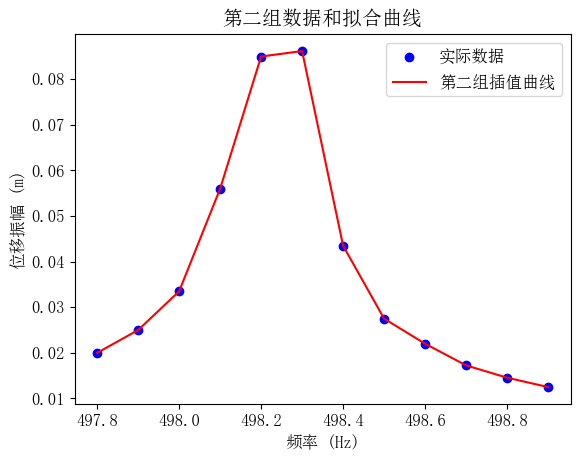

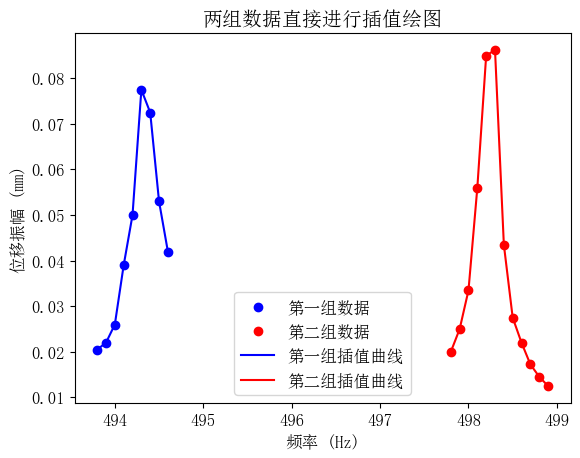

In [19]:
# 导入所需的库
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# 定义两组数据
f1 = np.array([493.8, 493.9, 494, 494.1, 494.2, 494.3, 494.4, 494.5, 494.6])
A1 = np.array([0.0205, 0.022, 0.026, 0.039, 0.05, 0.0775, 0.0725, 0.053, 0.042])
f2 = np.array([497.8, 497.9, 498.0, 498.1, 498.2, 498.3, 498.4,
               498.5, 498.6, 498.7, 498.8, 498.9])
A2 = np.array([0.02 ,0.025 ,0.0335 ,0.056 ,0.085 ,0.0862 ,
               0.0435 ,0.0275 ,0.022 ,0.01725 ,0.01455 ,0.0125])

# 创建一个新的自变量数组
xnew1 = np.linspace(493.8, 494.6, 100)
xnew2 = np.linspace(497.8, 498.9, 100)

# 对两组数据进行插值
f1_interp = interpolate.interp1d(f1, A1,fill_value='extrapolate') # 默认使用线性插值
f2_interp = interpolate.interp1d(f2, A2,fill_value='extrapolate') # 默认使用线性插值

# 计算新的因变量数组
ynew1 = f1_interp(xnew1)
ynew2 = f2_interp(xnew2)

# 绘制第一组数据和拟合曲线
plt.figure(1)
plt.plot(f1, A1, 'bo', label='实际数据')
plt.plot(xnew1, ynew1, 'b-', label='第一组插值曲线')
plt.xlabel('频率 (Hz)')
plt.ylabel('位移振幅 (m)')
plt.title('第一组数据和拟合曲线')
plt.legend()

# 绘制第二组数据和拟合曲线
plt.figure(2)
plt.plot(f2, A2, 'bo', label='实际数据')
plt.plot(xnew2, ynew2, 'r-', label='第二组插值曲线')
plt.xlabel('频率 (Hz)')
plt.ylabel('位移振幅 (m)')
plt.title('第二组数据和拟合曲线')
plt.legend()

# 绘制原始数据点和插值曲线
plt.figure(3)
plt.plot(f1, A1, 'bo', label='第一组数据')
plt.plot(f2, A2, 'ro', label='第二组数据')
plt.plot(xnew1, ynew1, 'b-', label='第一组插值曲线')
plt.plot(xnew2, ynew2, 'r-', label='第二组插值曲线')

# 设置坐标轴标签和标题
plt.xlabel('频率 (Hz)')
plt.ylabel('位移振幅 (mm)')
plt.title('两组数据直接进行插值绘图')

# 显示图例
plt.legend()

# 显示图形
plt.show()

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import rcParams
# If use jupyter
%matplotlib inline



# 载入宋体，注意修改文件目录
TimesSong = FontProperties(fname='simsun.ttc')
font_manager.fontManager.addfont('simsun.ttc')


# 全局设置字体及大小，设置公式字体即可
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['TimesSong'],
    'axes.unicode_minus': False, # 处理负号，即-号
    "font.size": 12
}

rcParams.update(config)

In [9]:
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu Serif
	DejaVu Serif Display
	STIXGeneral
	STIXNonUnicode
	STIXSizeFiveSym
	STIXSizeFourSym
	STIXSizeOneSym
	STIXSizeThreeSym
	STIXSizeTwoSym
	Ubuntu
	Ubuntu Condensed
	Ubuntu Mono
	cmb10
	cmex10
	cmmi10
	cmr10
	cmss10
	cmsy10
	cmtt10
